In [1]:
import mopa
import mopa_utils
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
tensor=np.load('./data/r160_subtype.npy',allow_pickle=True)
genelist=pd.read_csv('./data/genelist.txt')
gmt=open('./data/kegg_v3.gmt','r')
sample_info=pd.read_csv('./data/sampleid_list.txt')
ranks=pd.read_csv('./data/selected_features.txt')
survival_data=pd.read_csv('./data/COAD_surv.csv')
mo = pd.read_csv('./data/score.csv')

In [3]:
gmt_binary=mopa.gmt_to_binary(gmt,genelist)

In [4]:
gmt_binary

,Glycolysis / Gluconeogenesis,Citrate cycle (TCA cycle),Pentose phosphate pathway,Pentose and glucuronate interconversions,Fructose and mannose metabolism,Galactose metabolism,Ascorbate and aldarate metabolism,Fatty acid biosynthesis,Fatty acid elongation,Fatty acid degradation,...,Systemic lupus erythematosus,Rheumatoid arthritis,Allograft rejection,Graft-versus-host disease,Primary immunodeficiency,Hypertrophic cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Dilated cardiomyopathy,Viral myocarditis,Fluid shear stress and atherosclerosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gmt=open('./data/kegg_v3.gmt','r')
mo=mopa.mopa_mes(tensor,sample_info,genelist,gmt,0,0.7,19,3)

In [ ]:
mo

In [8]:
survival=mopa_utils.survival(survival_data,sample_info,mo,0.3)

In [9]:
survival

,p-value,feature_score
Unnamed: 0,,
Glycolysis / Gluconeogenesis,0.952496,0.002257
Citrate cycle (TCA cycle),0.377673,0.002915
Pentose phosphate pathway,0.892942,0.000382
Pentose and glucuronate interconversions,0.334668,0.001935
Fructose and mannose metabolism,0.543365,0.002820
...,...,...
Hypertrophic cardiomyopathy,0.025102,0.004158
Arrhythmogenic right ventricular cardiomyopathy,0.180755,0.004712
Dilated cardiomyopathy,0.020112,0.002384


In [3]:
gmt=open('./data/kegg_v3.gmt','r')
cms4,node = mopa.mopa_OCR(tensor,gmt,0,genelist,sample_info,'CMS4',0.6)

In [4]:
node

,ID,name
0,Glycolysis / Gluconeogenesis,Glycolysis / Gluconeogenesis
1,Citrate cycle (TCA cycle),Citrate cycle (TCA cycle)
2,Pentose phosphate pathway,Pentose phosphate pathway
3,Pentose and glucuronate interconversions,Pentose and glucuronate interconversions
4,Fructose and mannose metabolism,Fructose and mannose metabolism
...,...,...
332,Hypertrophic cardiomyopathy,Hypertrophic cardiomyopathy
333,Arrhythmogenic right ventricular cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy
334,Dilated cardiomyopathy,Dilated cardiomyopathy
335,Viral myocarditis,Viral myocarditis


In [5]:
cms4

,GE,methy,miRNA,name
0,10.589307,6.153404,8.257289,GLYCOLYSIS / GLUCONEOGENESIS
1,4.955796,2.662678,7.381525,CITRATE CYCLE (TCA CYCLE)
2,4.828164,3.611154,4.560682,PENTOSE PHOSPHATE PATHWAY
3,3.425388,3.745518,1.829094,PENTOSE AND GLUCURONATE INTERCONVERSIONS
4,6.633932,4.850100,6.515968,FRUCTOSE AND MANNOSE METABOLISM
...,...,...,...,...
332,17.223690,7.093702,29.682608,HYPERTROPHIC CARDIOMYOPATHY
333,16.192220,4.880596,26.927184,ARRHYTHMOGENIC RIGHT VENTRICULAR CARDIOMYOPATHY
334,20.534472,7.169030,29.296498,DILATED CARDIOMYOPATHY
335,15.780599,3.536141,11.683260,VIRAL MYOCARDITIS


<AxesSubplot:xlabel='x', ylabel='y'>

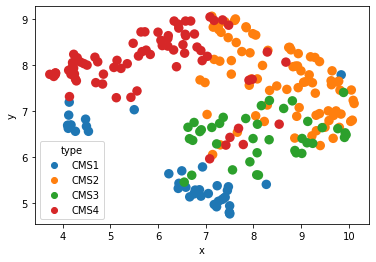

In [4]:
mopa_utils.draw_umap(mo,sample_info)

<Figure size 1440x1080 with 0 Axes>

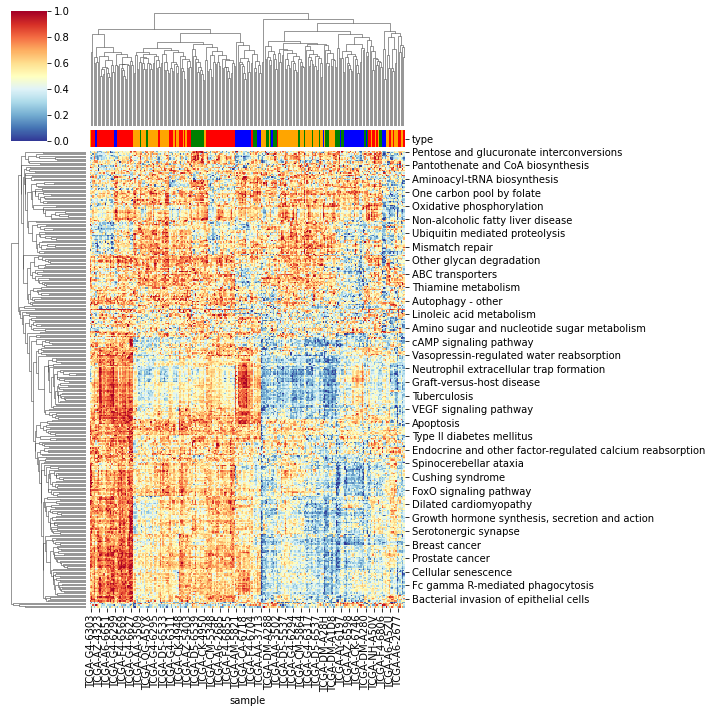

In [5]:
mopa_utils.draw_heatmap(mo,sample_info)

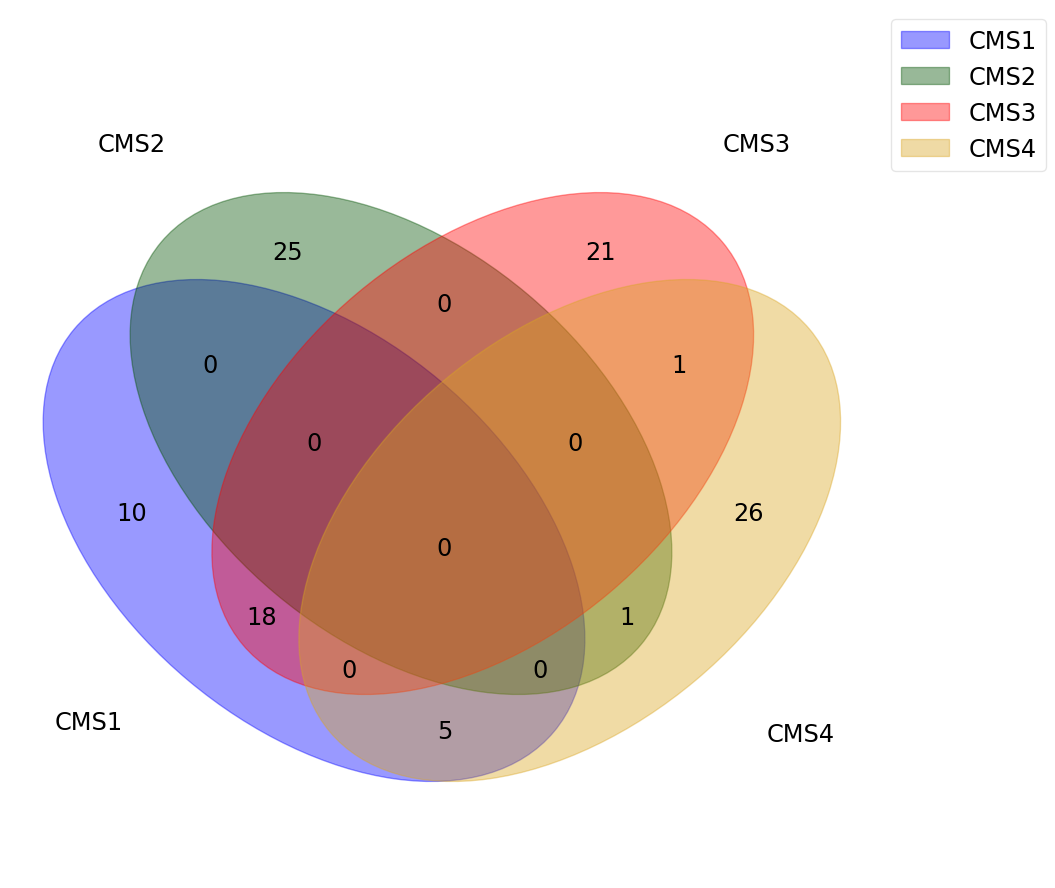

In [3]:
gmt=open('./data/kegg_v3.gmt','r')
ven=mopa_utils.venn_rank(tensor,gmt,0,genelist,sample_info,0.6)

In [6]:
import py4cytoscape as p4c
import pandas as pd
p4c.cytoscape_ping()
p4c.install_app('enrichmentmap')

You are connected to Cytoscape!
{}


{}

Filtering pathways

In [12]:
survival_v1=survival.reset_index(drop=True)
node_v1=node.copy()
node_v1['p-value']=survival_v1['p-value']

In [13]:
node_v1

,ID,name,p-value
0,Glycolysis / Gluconeogenesis,Glycolysis / Gluconeogenesis,0.952496
1,Citrate cycle (TCA cycle),Citrate cycle (TCA cycle),0.377673
2,Pentose phosphate pathway,Pentose phosphate pathway,0.892942
3,Pentose and glucuronate interconversions,Pentose and glucuronate interconversions,0.334668
4,Fructose and mannose metabolism,Fructose and mannose metabolism,0.543365
...,...,...,...
332,Hypertrophic cardiomyopathy,Hypertrophic cardiomyopathy,0.025102
333,Arrhythmogenic right ventricular cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,0.180755
334,Dilated cardiomyopathy,Dilated cardiomyopathy,0.020112
335,Viral myocarditis,Viral myocarditis,0.006899


In [18]:
node1=pd.DataFrame(index=range(0,len(node.index)),columns=['name','GE','methy','miRNA'])
node1.iloc[:,0]=node.index
node=node.reset_index(drop=True)
node1.iloc[:,1]=node.iloc[:,0].copy()
node1.iloc[:,2]=node.iloc[:,1]
node1.iloc[:,3]=node.iloc[:,2]

In [17]:
node_v1.to_csv('C:/Program Files/Cytoscape_v3.8.0/COAD_node.txt',sep='\t',index=False)

In [20]:
gmt=open('c2.cp.kegg.v6.0.symbols.gmt','r')
data = node1
data.columns=['name','GE','methy','miRNA']
p4c.commands_run('enrichmentmap build analysisType="great" gmtFile="kegg_v3.gmt" enrichmentsDataset1="EBV_cyto_node_v_100.txt"')
for i in data.index:
    data.iloc[i,0]=data.iloc[i,0].upper()
p4c.load_table_data(data, data_key_column="name")
p4c.set_node_custom_pie_chart(['GE', 'methy','miRNA'],colors=['#FF00FF','#FFFFFF','#00FF00'],style_name='EM1_Visual_Style')

''

In [24]:
node_v1

,ID,name,p-value
0,Glycolysis / Gluconeogenesis,Glycolysis / Gluconeogenesis,0.952496
1,Citrate cycle (TCA cycle),Citrate cycle (TCA cycle),0.377673
2,Pentose phosphate pathway,Pentose phosphate pathway,0.892942
3,Pentose and glucuronate interconversions,Pentose and glucuronate interconversions,0.334668
4,Fructose and mannose metabolism,Fructose and mannose metabolism,0.543365
...,...,...,...
332,Hypertrophic cardiomyopathy,Hypertrophic cardiomyopathy,0.025102
333,Arrhythmogenic right ventricular cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,0.180755
334,Dilated cardiomyopathy,Dilated cardiomyopathy,0.020112
335,Viral myocarditis,Viral myocarditis,0.006899


In [28]:

#data = cms4.copy()
#data.columns=['GE','methy','miRNA']
p4c.commands_run('enrichmentmap build analysisType="great" pvalue=0.05 gmtFile="kegg_v3.gmt" enrichmentsDataset1="COAD_node.txt"')
p4c.load_table_data(cms4, data_key_column="name")
p4c.set_node_color_mapping('EnrichmentMap::pvalue (Dataset 1)', [0, 0.05], ['#ff0000', '#ffffff'])
p4c.set_node_custom_pie_chart(['GE', 'methy','miRNA'],colors=['#06a2cb', '#ebb035', '#218559'],style_name='EM2_Visual_Style')

style_name not specified, so updating "default" style.


''

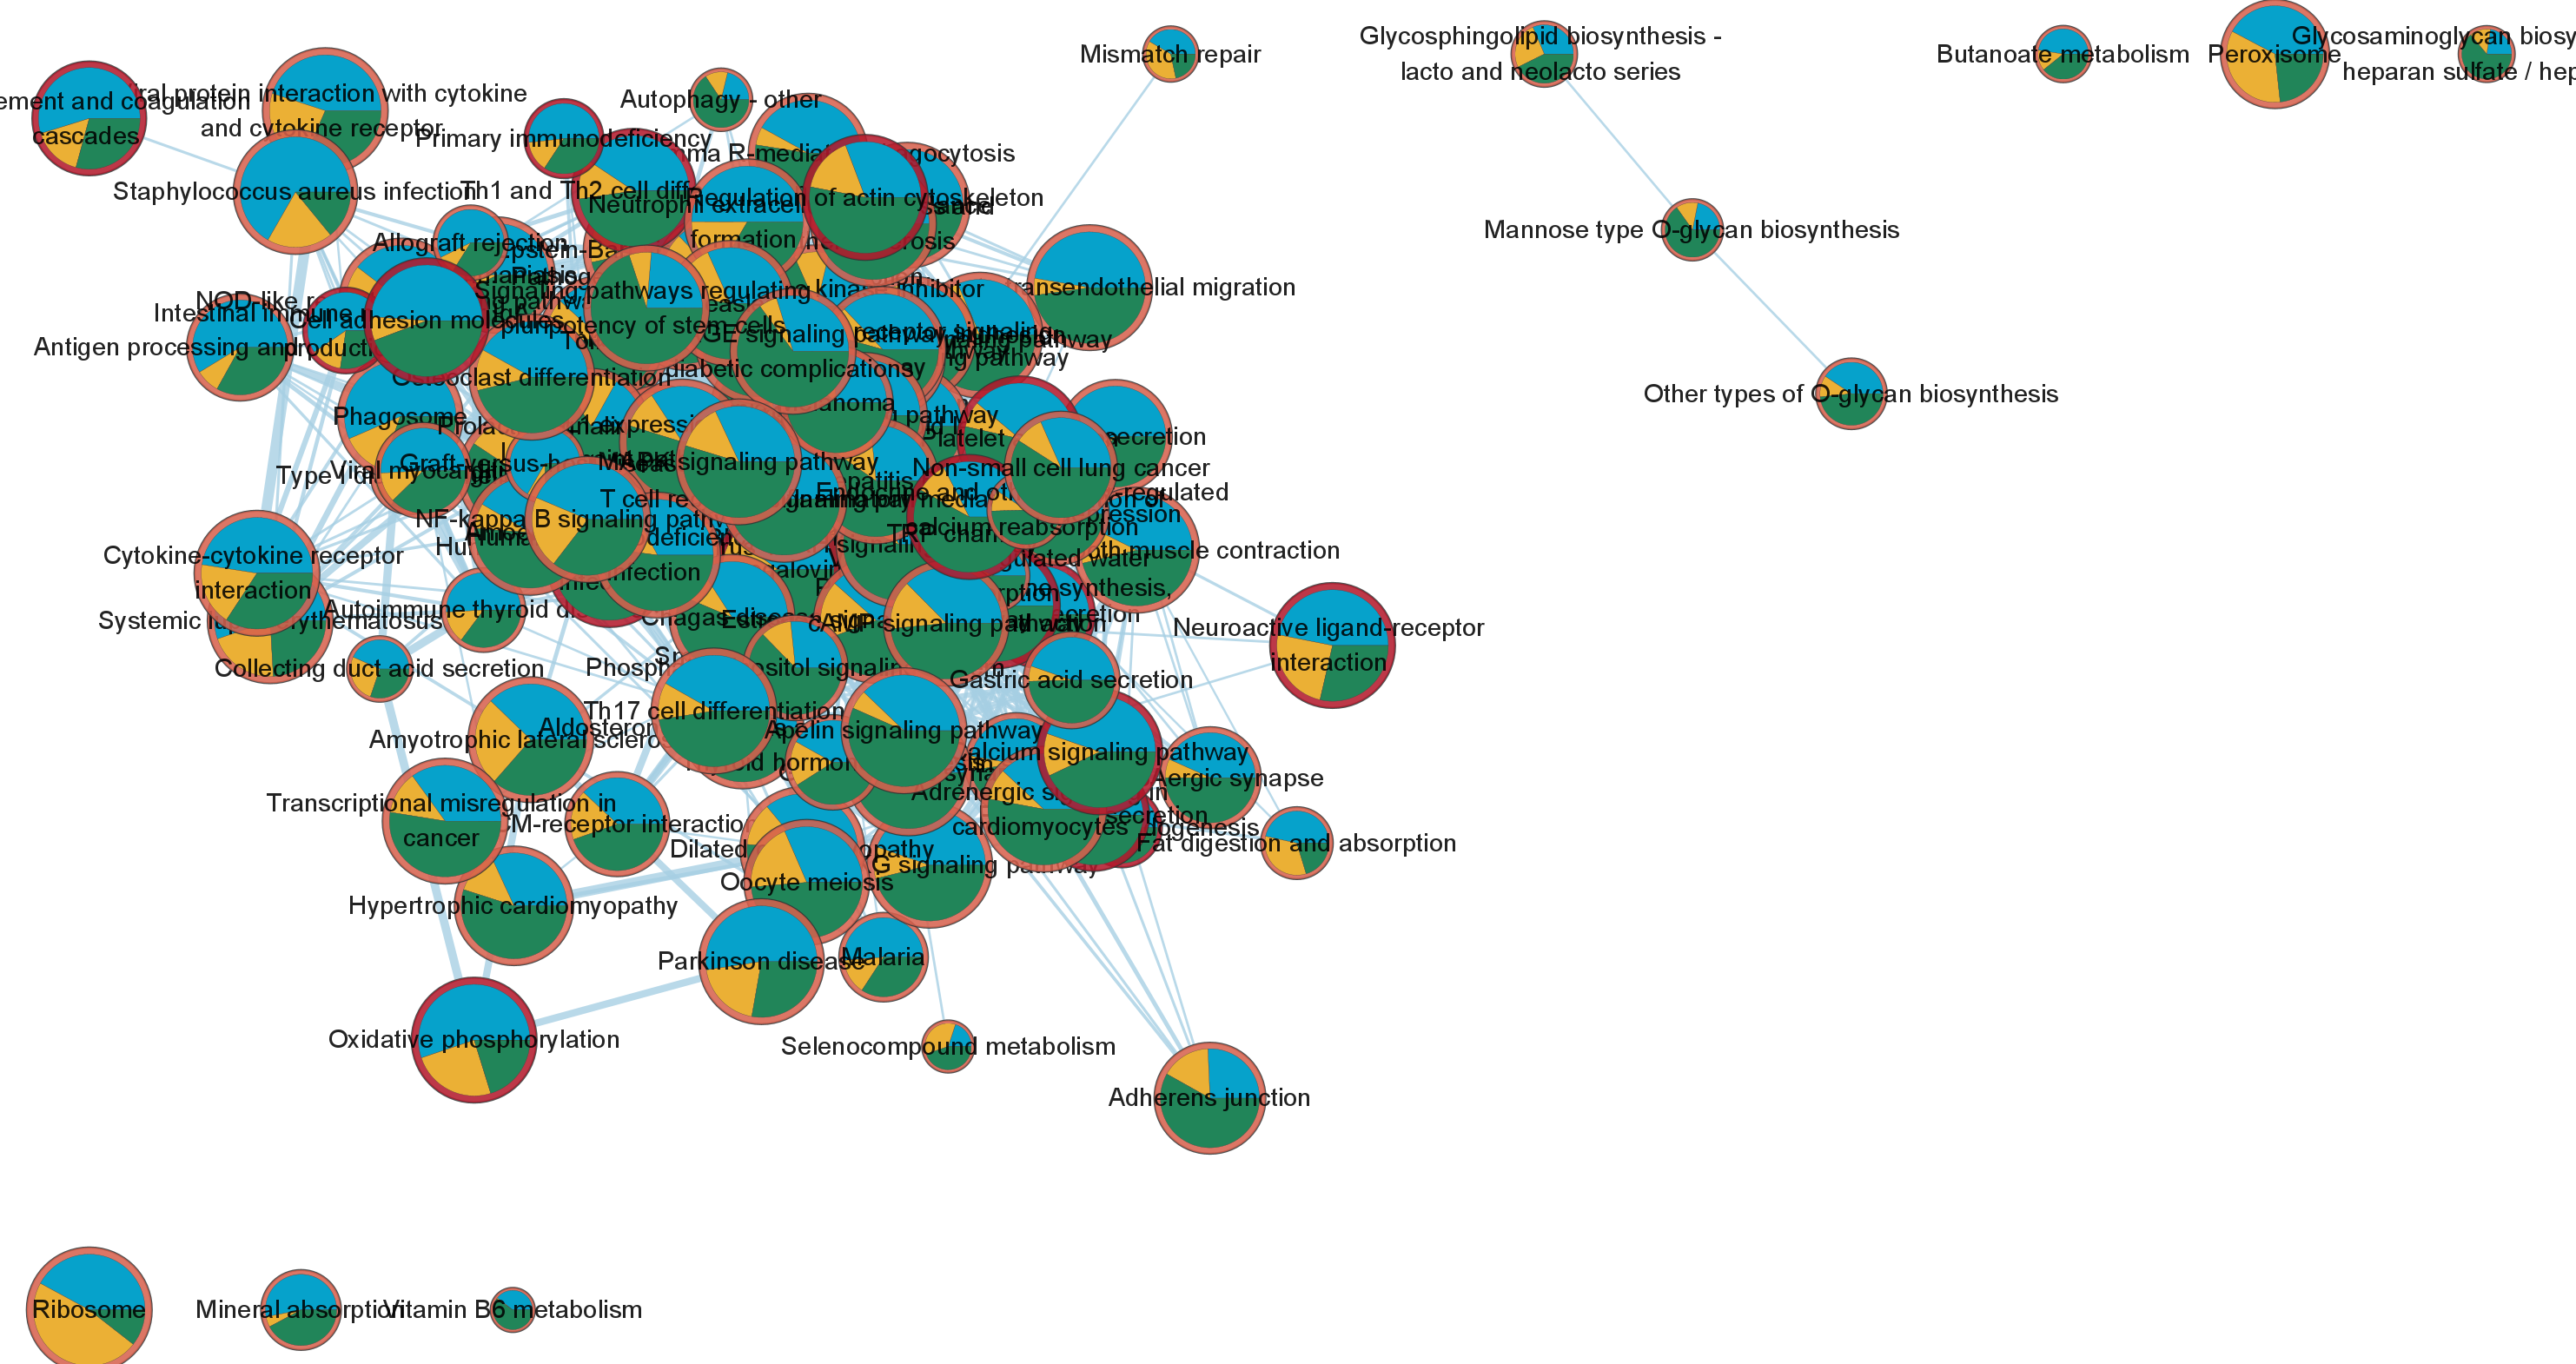

In [29]:
p4c.notebook_export_show_image()

In [ ]:
data = pd.read_csv("EBV_cyto_omics_percentage_v_100.txt",sep='\t')

In [54]:
pd.read_csv("EBV_cyto_omics_percentage_v_100.txt",sep='\t')

,ID,GE,methy,miRNA
0,Fatty acid biosynthesis,2.719056,3.098582,3.182362
1,Fatty acid degradation,6.606342,6.979987,3.413671
2,Primary bile acid biosynthesis,2.135476,2.165983,2.698541
3,Cysteine and methionine metabolism,8.454615,8.677082,6.868303
4,"Valine, leucine and isoleucine biosynthesis",1.902589,2.193217,0.904194
5,"Phenylalanine, tyrosine and tryptophan biosynt...",0.977970,0.958942,0.063088
6,Phosphonate and phosphinate metabolism,0.629015,0.282382,2.088602
7,Ether lipid metabolism,8.412768,6.257209,7.330023
8,Arachidonic acid metabolism,10.643958,11.754917,3.601125
9,Glycosphingolipid biosynthesis - ganglio series,1.315245,3.685604,0.999151


In [96]:
data = pd.read_csv("EBV_cyto_omics_percentage_v_100.txt",sep='\t')
data.columns=['name','GE','methy','miRNA']
p4c.commands_run('enrichmentmap build analysisType="great" gmtFile="kegg_v3.gmt" enrichmentsDataset1="EBV_cyto_node_v_100.txt"')
for i in data.index:
    data.iloc[i,0]=data.iloc[i,0].upper()
p4c.load_table_data(data, data_key_column="name")
p4c.set_node_custom_pie_chart(['GE', 'methy','miRNA'],colors=['#06a2cb', '#ebb035', '#218559'],style_name='EM2_Visual_Style')

''

In [95]:
p4c.set_node_custom_pie_chart(['GE','methy','miRNA'],colors=['#FF00FF','#F11FFF','#FF0000'],style_name='Solid')
#06a2cb', '#ebb035', '#218559'

''

In [94]:
p4c.set_node_color_default('#666666',style_name='a')

In cyrest_put(): Could not find Visual Style: a


CyError: In cyrest_put(): Could not find Visual Style: a

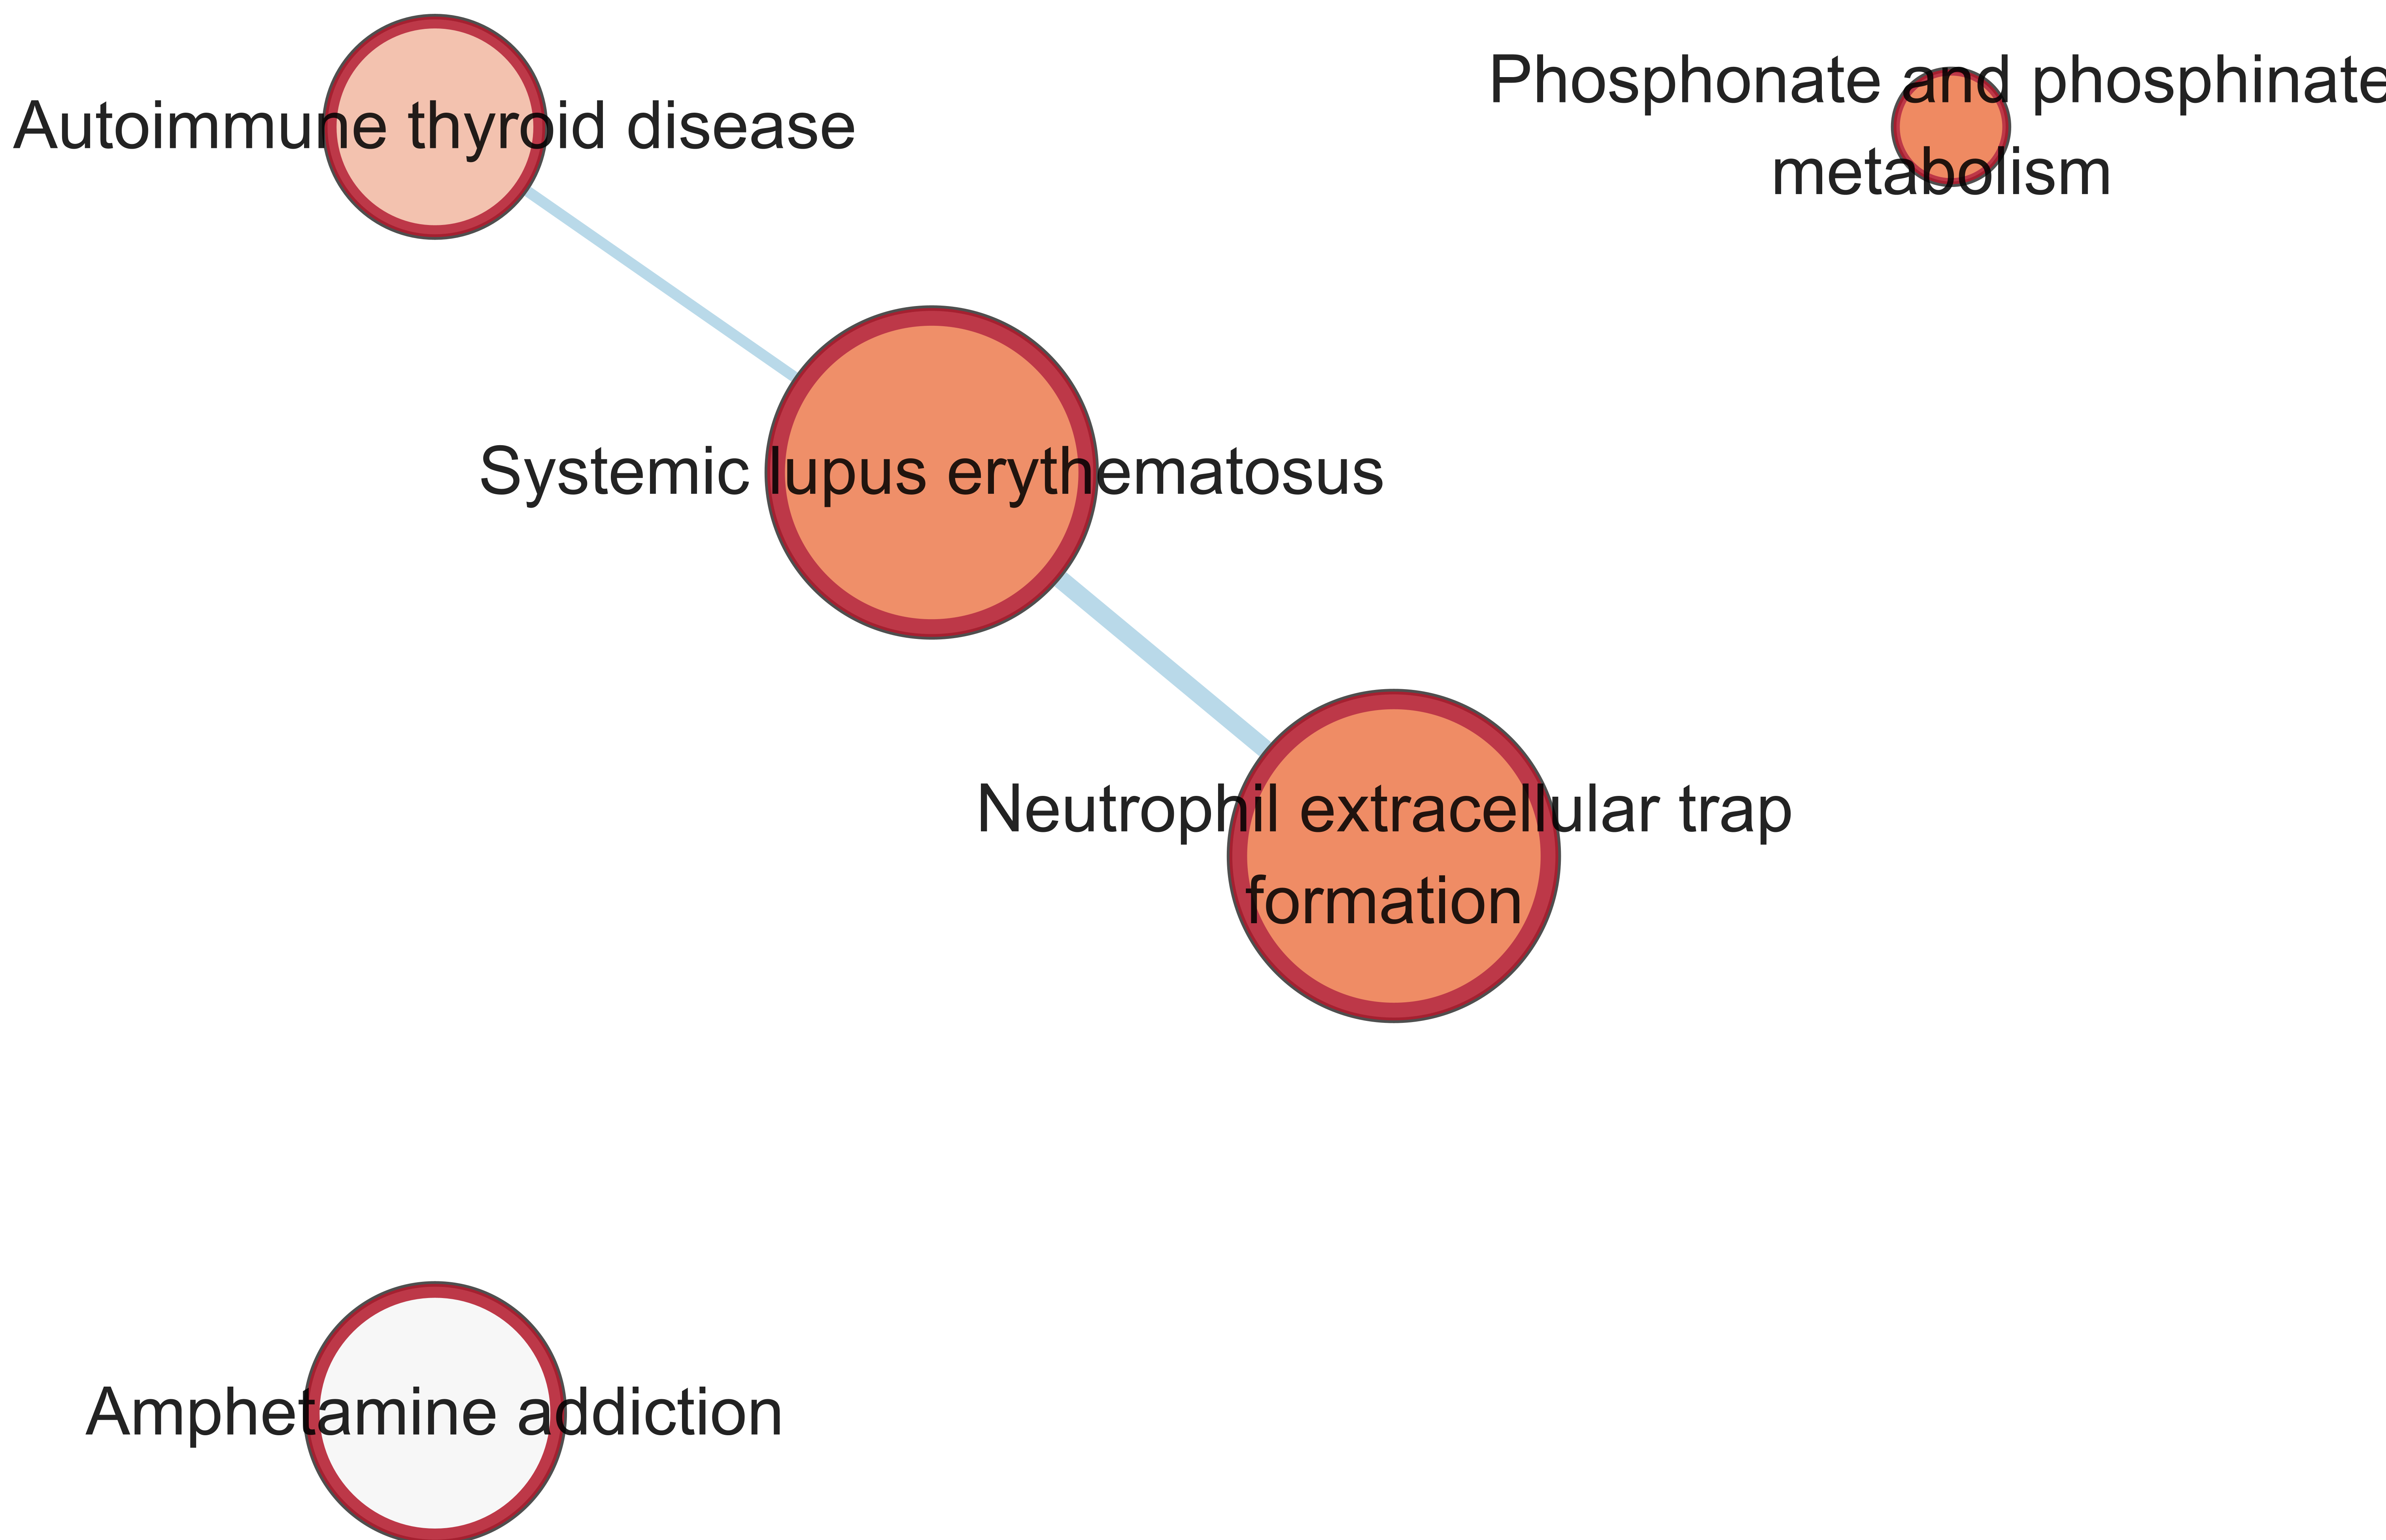

In [73]:
p4c.notebook_export_show_image()

In [278]:
p4c.set_node_custom_pie_chart(['score'], colors=['#FF00FF'], style_name='EM1_Visual_Style')

''

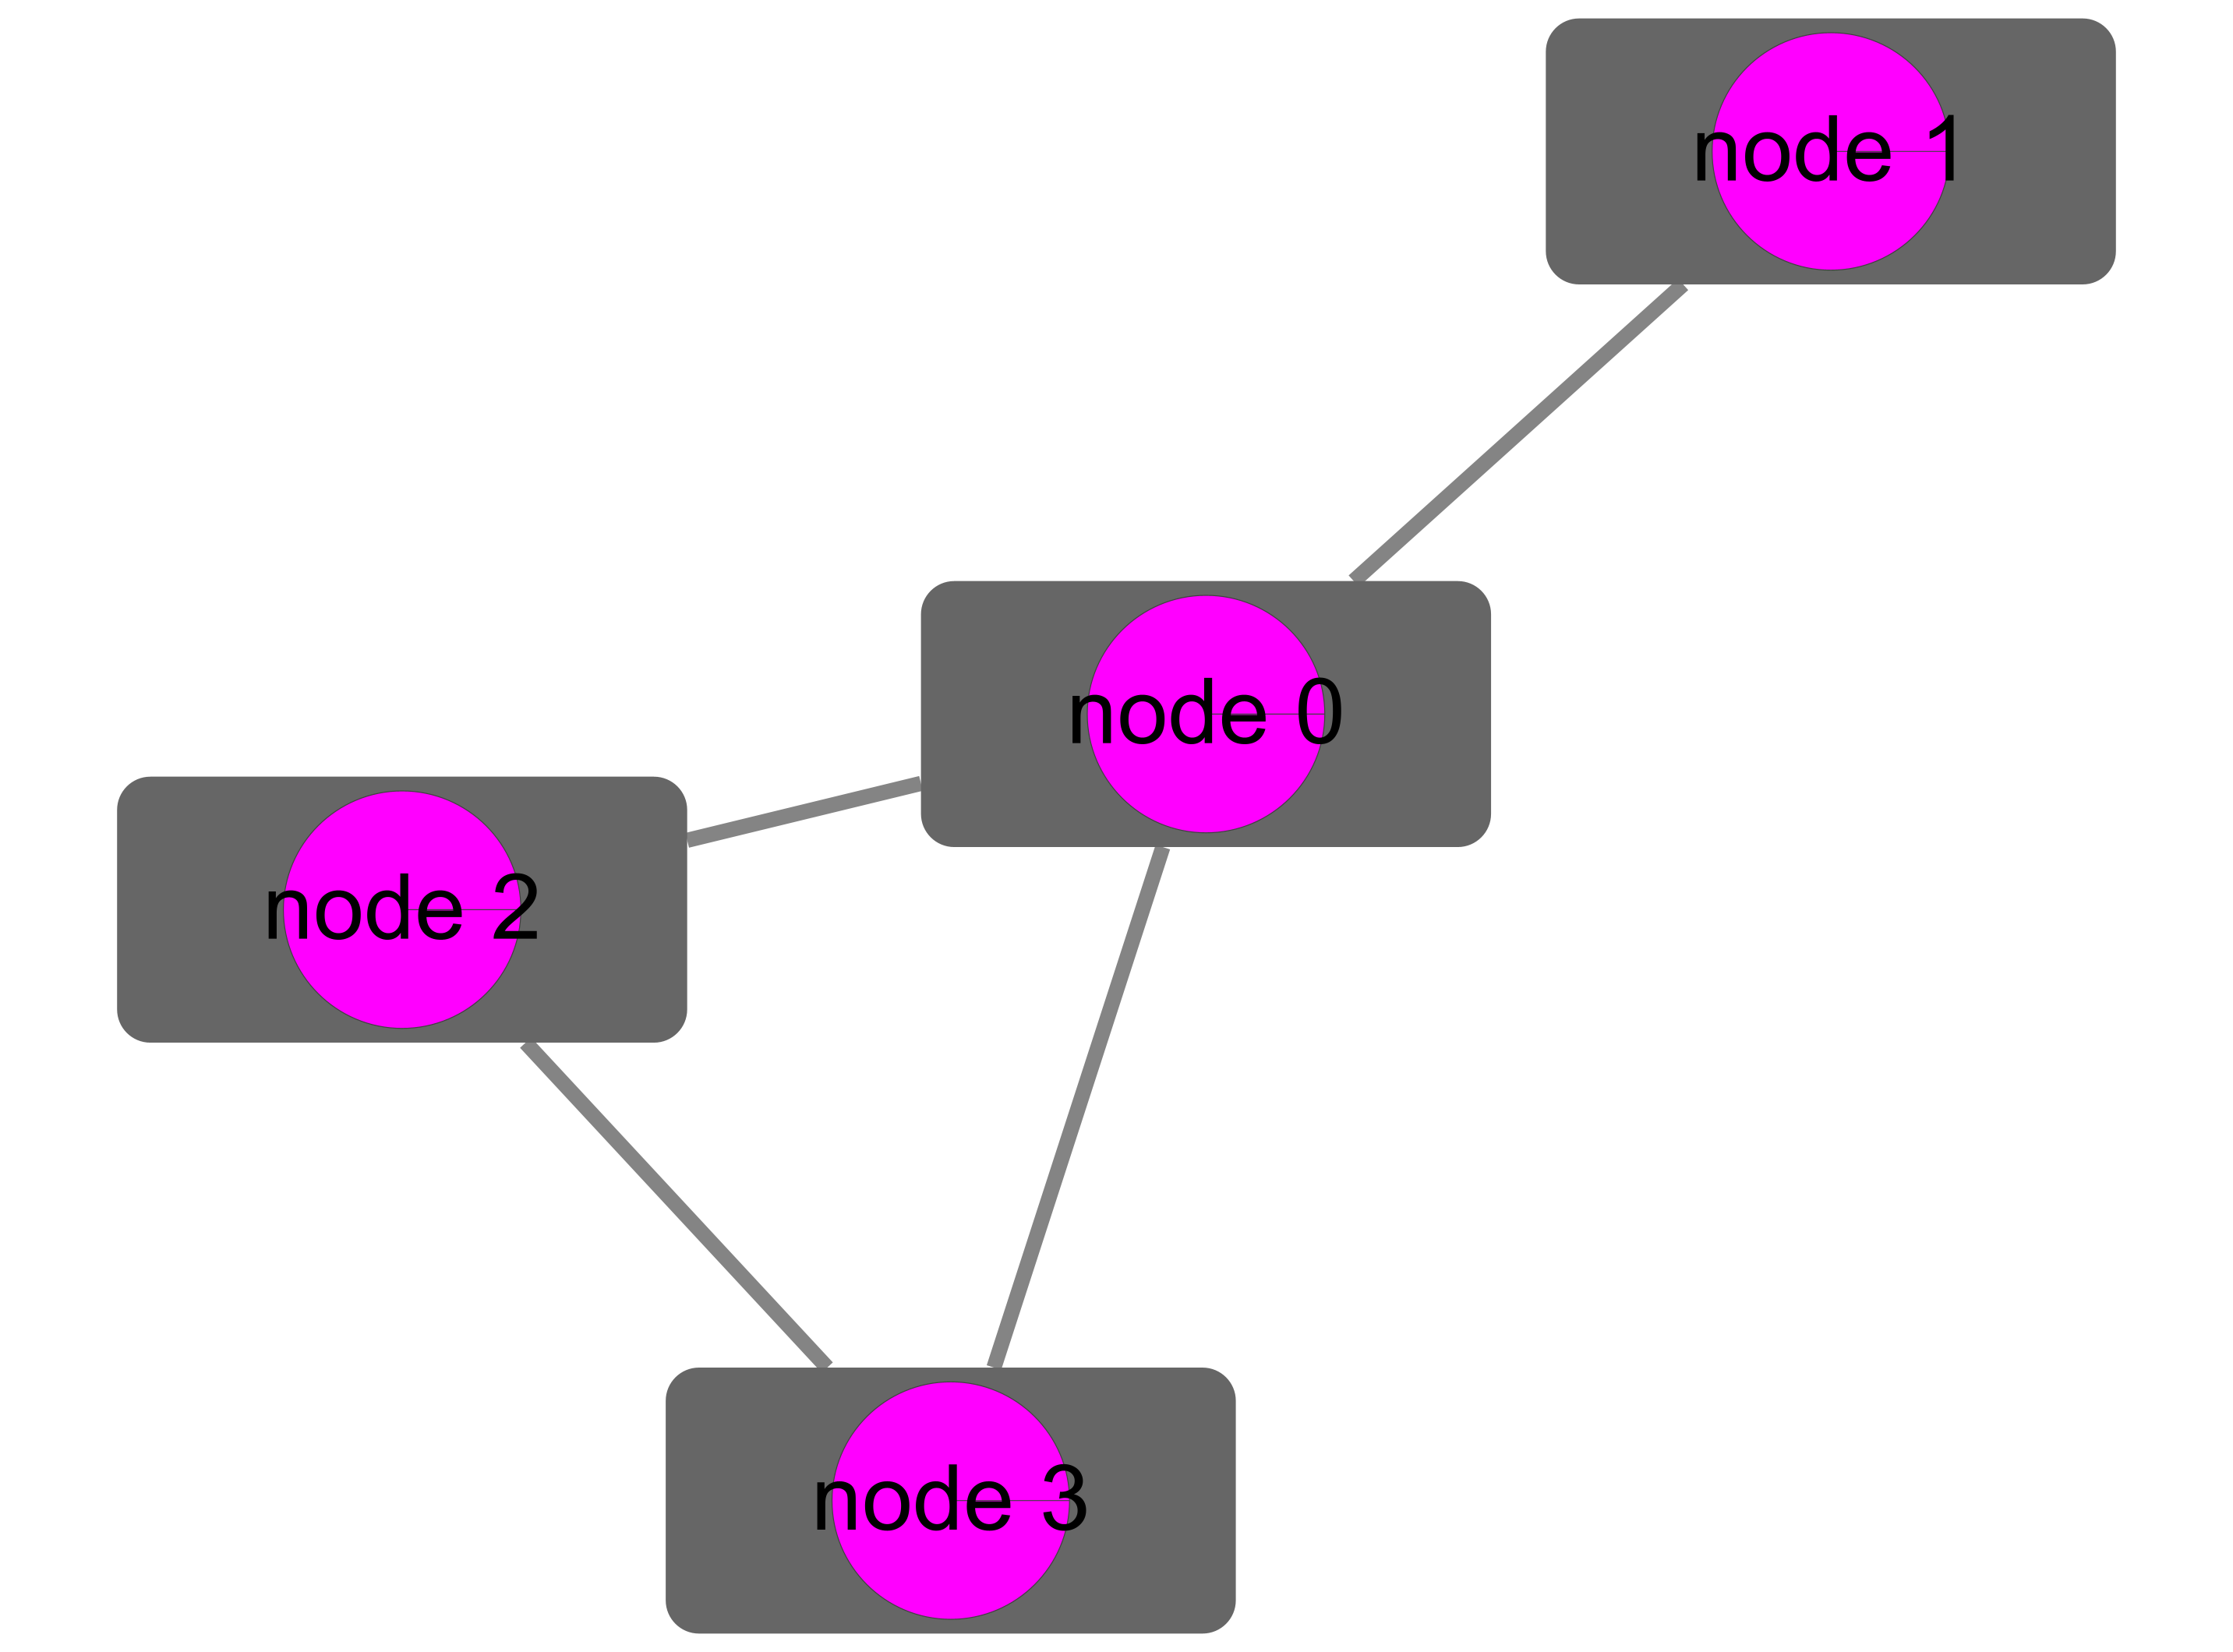

In [279]:
p4c.notebook_export_show_image()

In [145]:
p4c.install_app('enrichmentmap')

{}


{}

In [9]:
p4c.get_app_information('enrichmentmap')

{'app': 'enrichmentmap',
 'descriptionName': 'Visualizes enrichments of pathways as an enrichment map, a network representing overlaps among enriched pathways.',
 'version': '3.3.3'}

In [34]:
p4c.commands_post('enrichmentmap build')

In commands_post(): None of the gene sets have passed the filter. Try relaxing the gene set filter parameters.


CyError: In commands_post(): None of the gene sets have passed the filter. Try relaxing the gene set filter parameters.

In [188]:
gmt=open('c2.cp.kegg.v6.0.symbols.gmt','r')

In [189]:
p4c.commands_run('enrichmentmap build analysisType="great" gmtFile="kegg_v3.gmt" enrichmentsDataset1="EBV_cyto_node_v_100.txt"')

['78']

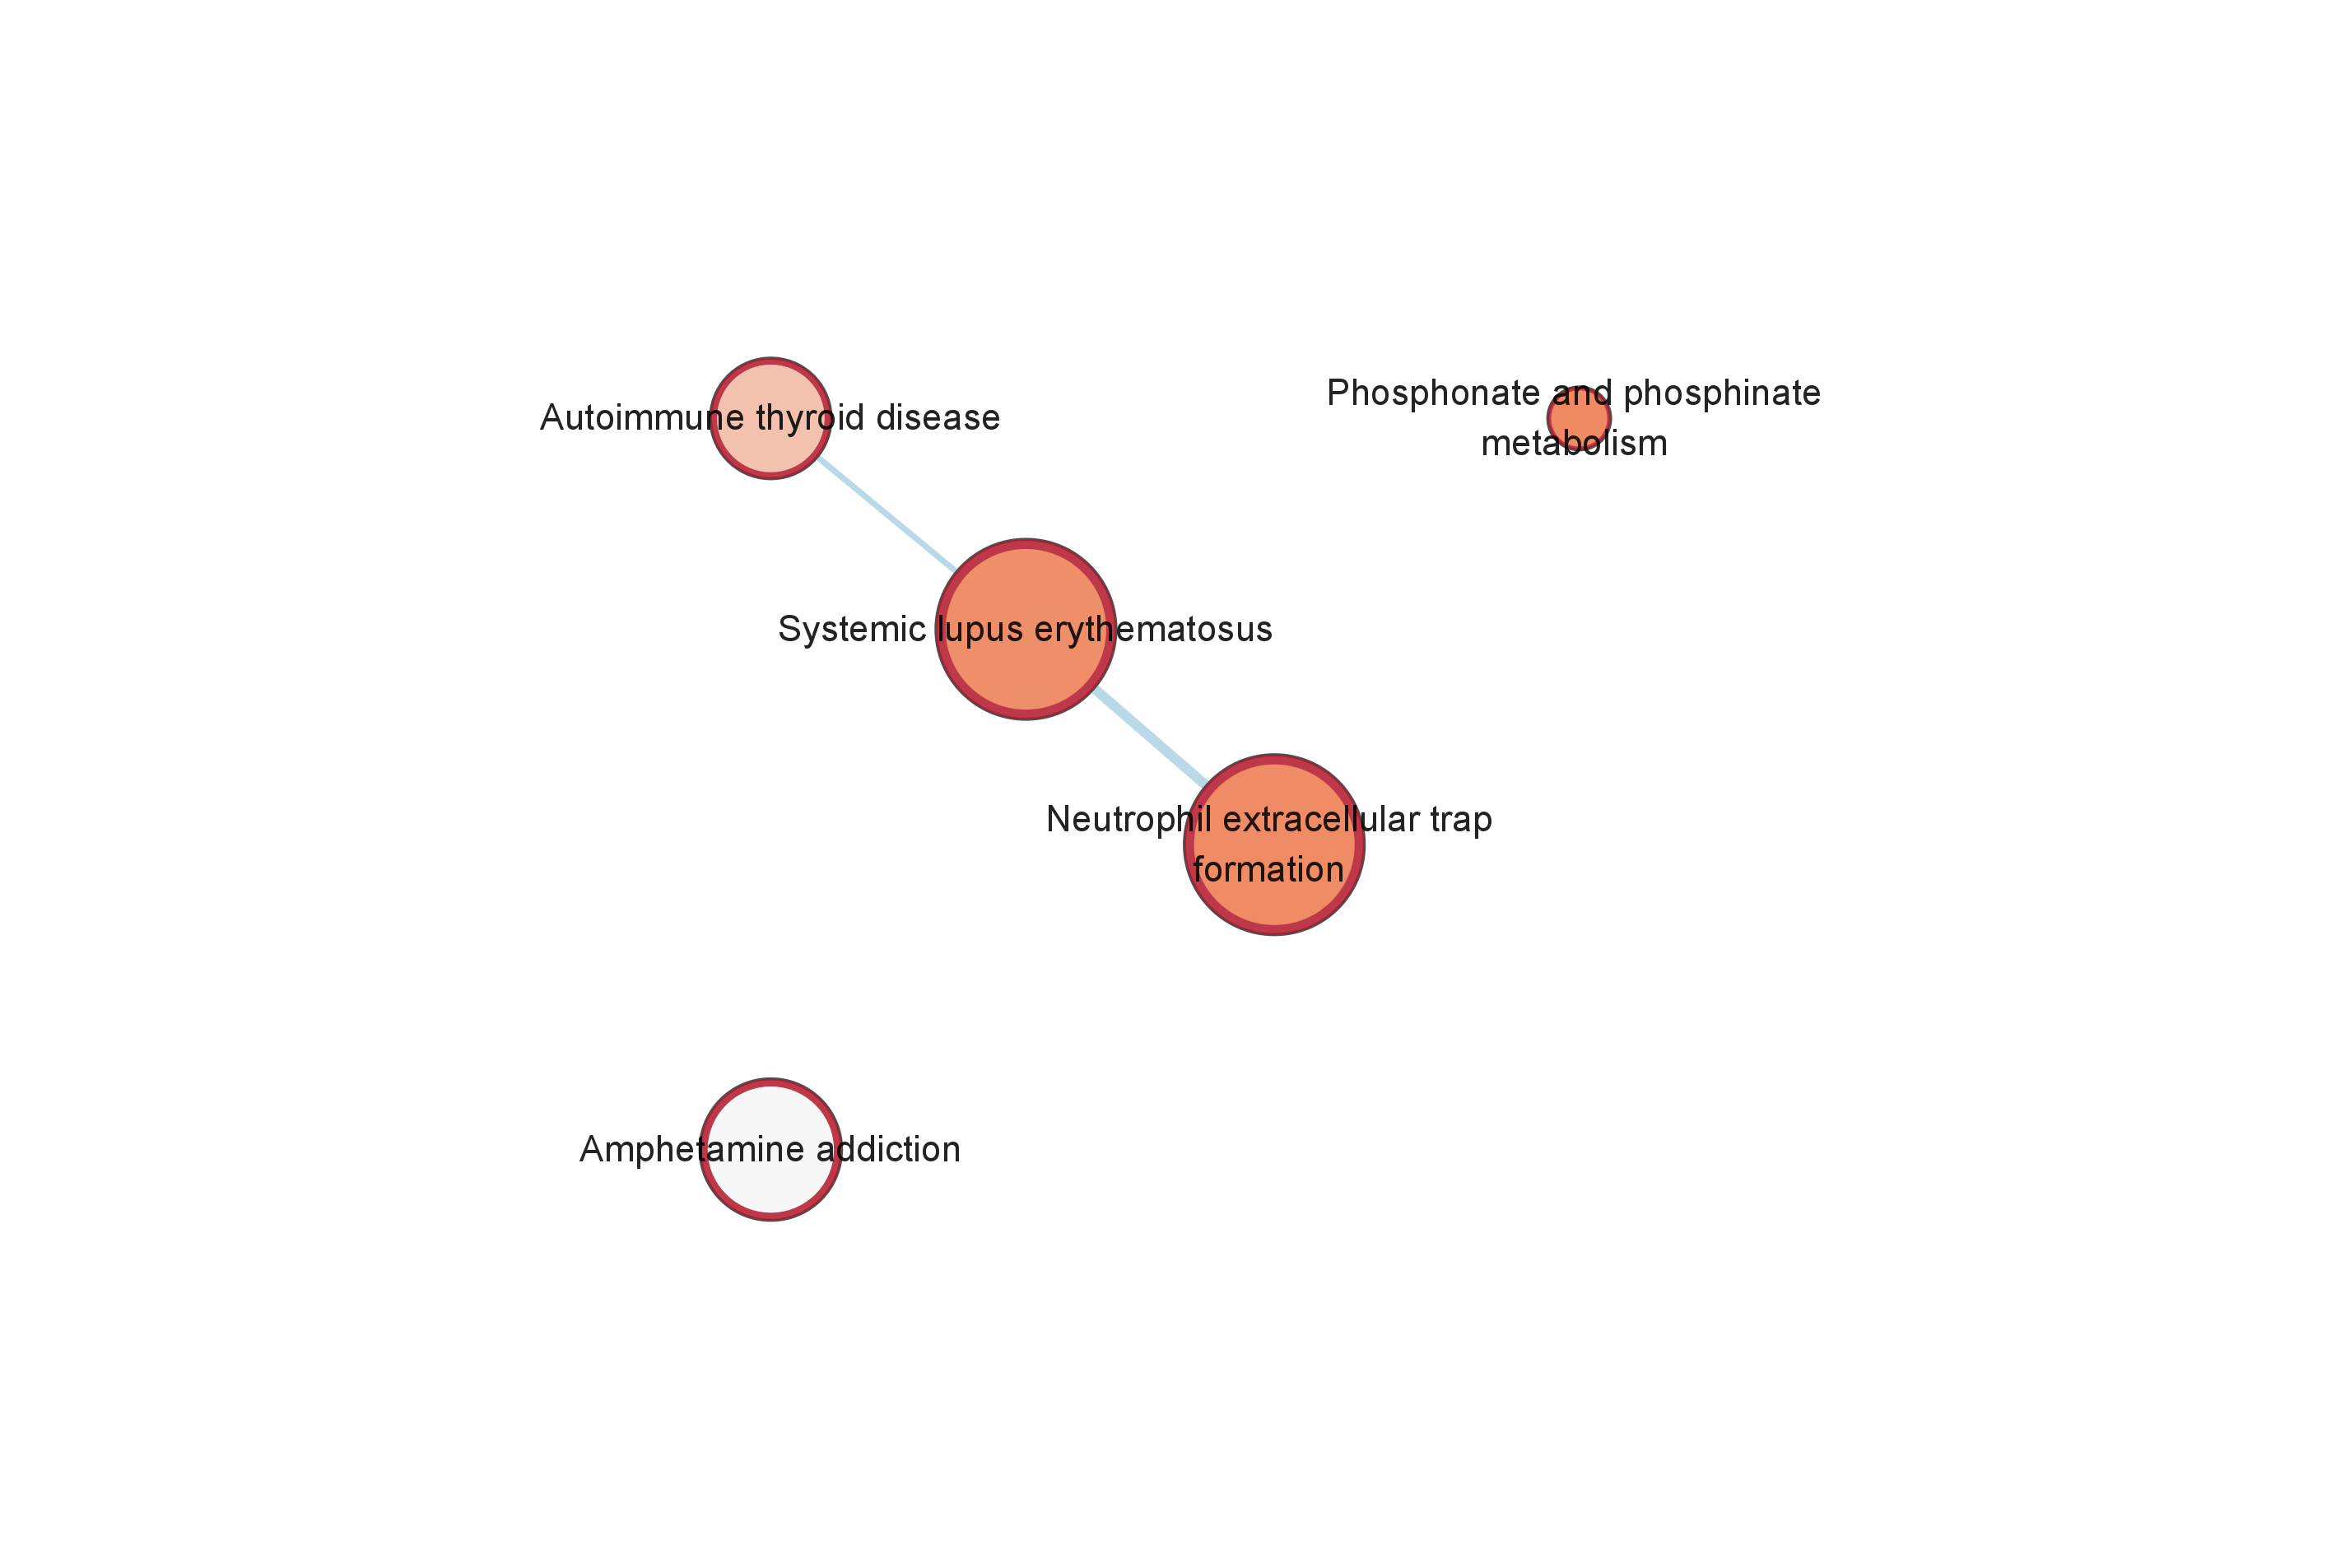

In [168]:
p4c.notebook_export_show_image()

In [264]:
p4c.get_table_columns()

,SUID,shared name,name,selected,id,score,group
129,129,node 0,node 0,False,node 0,20,A
130,130,node 1,node 1,False,node 1,10,A
131,131,node 2,node 2,False,node 2,15,B
132,132,node 3,node 3,False,node 3,5,B


In [76]:
data = pd.read_csv("EBV_cyto_omics_percentage_v_100.txt",sep='\t')

In [77]:
data.columns=['name','GE','methy','miRNA']

In [78]:
p4c.set_node_custom_pie_chart(['SUID','score'],start_angle=0.0, colors=['#FF00FF','#FFFFFF'],style_name='Sample1')

''

In [249]:
p4c.get_table_columns()

,SUID,shared name,name,selected,id,score,group
129,129,node 0,node 0,False,node 0,20,A
130,130,node 1,node 1,False,node 1,10,A
131,131,node 2,node 2,False,node 2,15,B
132,132,node 3,node 3,False,node 3,5,B


In [250]:
for i in data.index:
    data.iloc[i,0]=data.iloc[i,0].upper()

In [251]:
p4c.load_table_data(data, data_key_column="name")

In load_table_data(): Provided table key column "name" and data key column "name" do not contain any matches


CyError: In load_table_data(): Provided table key column "name" and data key column "name" do not contain any matches

In [203]:
p4c.set_visual_style('Marquee')

{'message': 'Visual Style applied.'}

In [224]:
p4c.get_table_columns('AUTOIMMUNE THYROID DISEASE',['#FFFFFF'])

In cyrest_get(): No such table type: default['#FFFFFF']


CyError: In cyrest_get(): No such table type: default['#FFFFFF']

In [82]:
p4c.set_node_custom_pie_chart(['GE', 'methy','miRNA'],start_angle=0.0, colors=['#FF00FF','#FFFFFF','#00FF00'],style_name='Sample1')

''

In [83]:
p4c.set_node_color_mapping('EnrichmentMap::Colouring (Dataset 1)',[0,5],['#FFFFFF','#FFFFFF'])

style_name not specified, so updating "default" style.


''

In [84]:
p4c.set_node_color_default('#666666',style_name='Ripple')

''

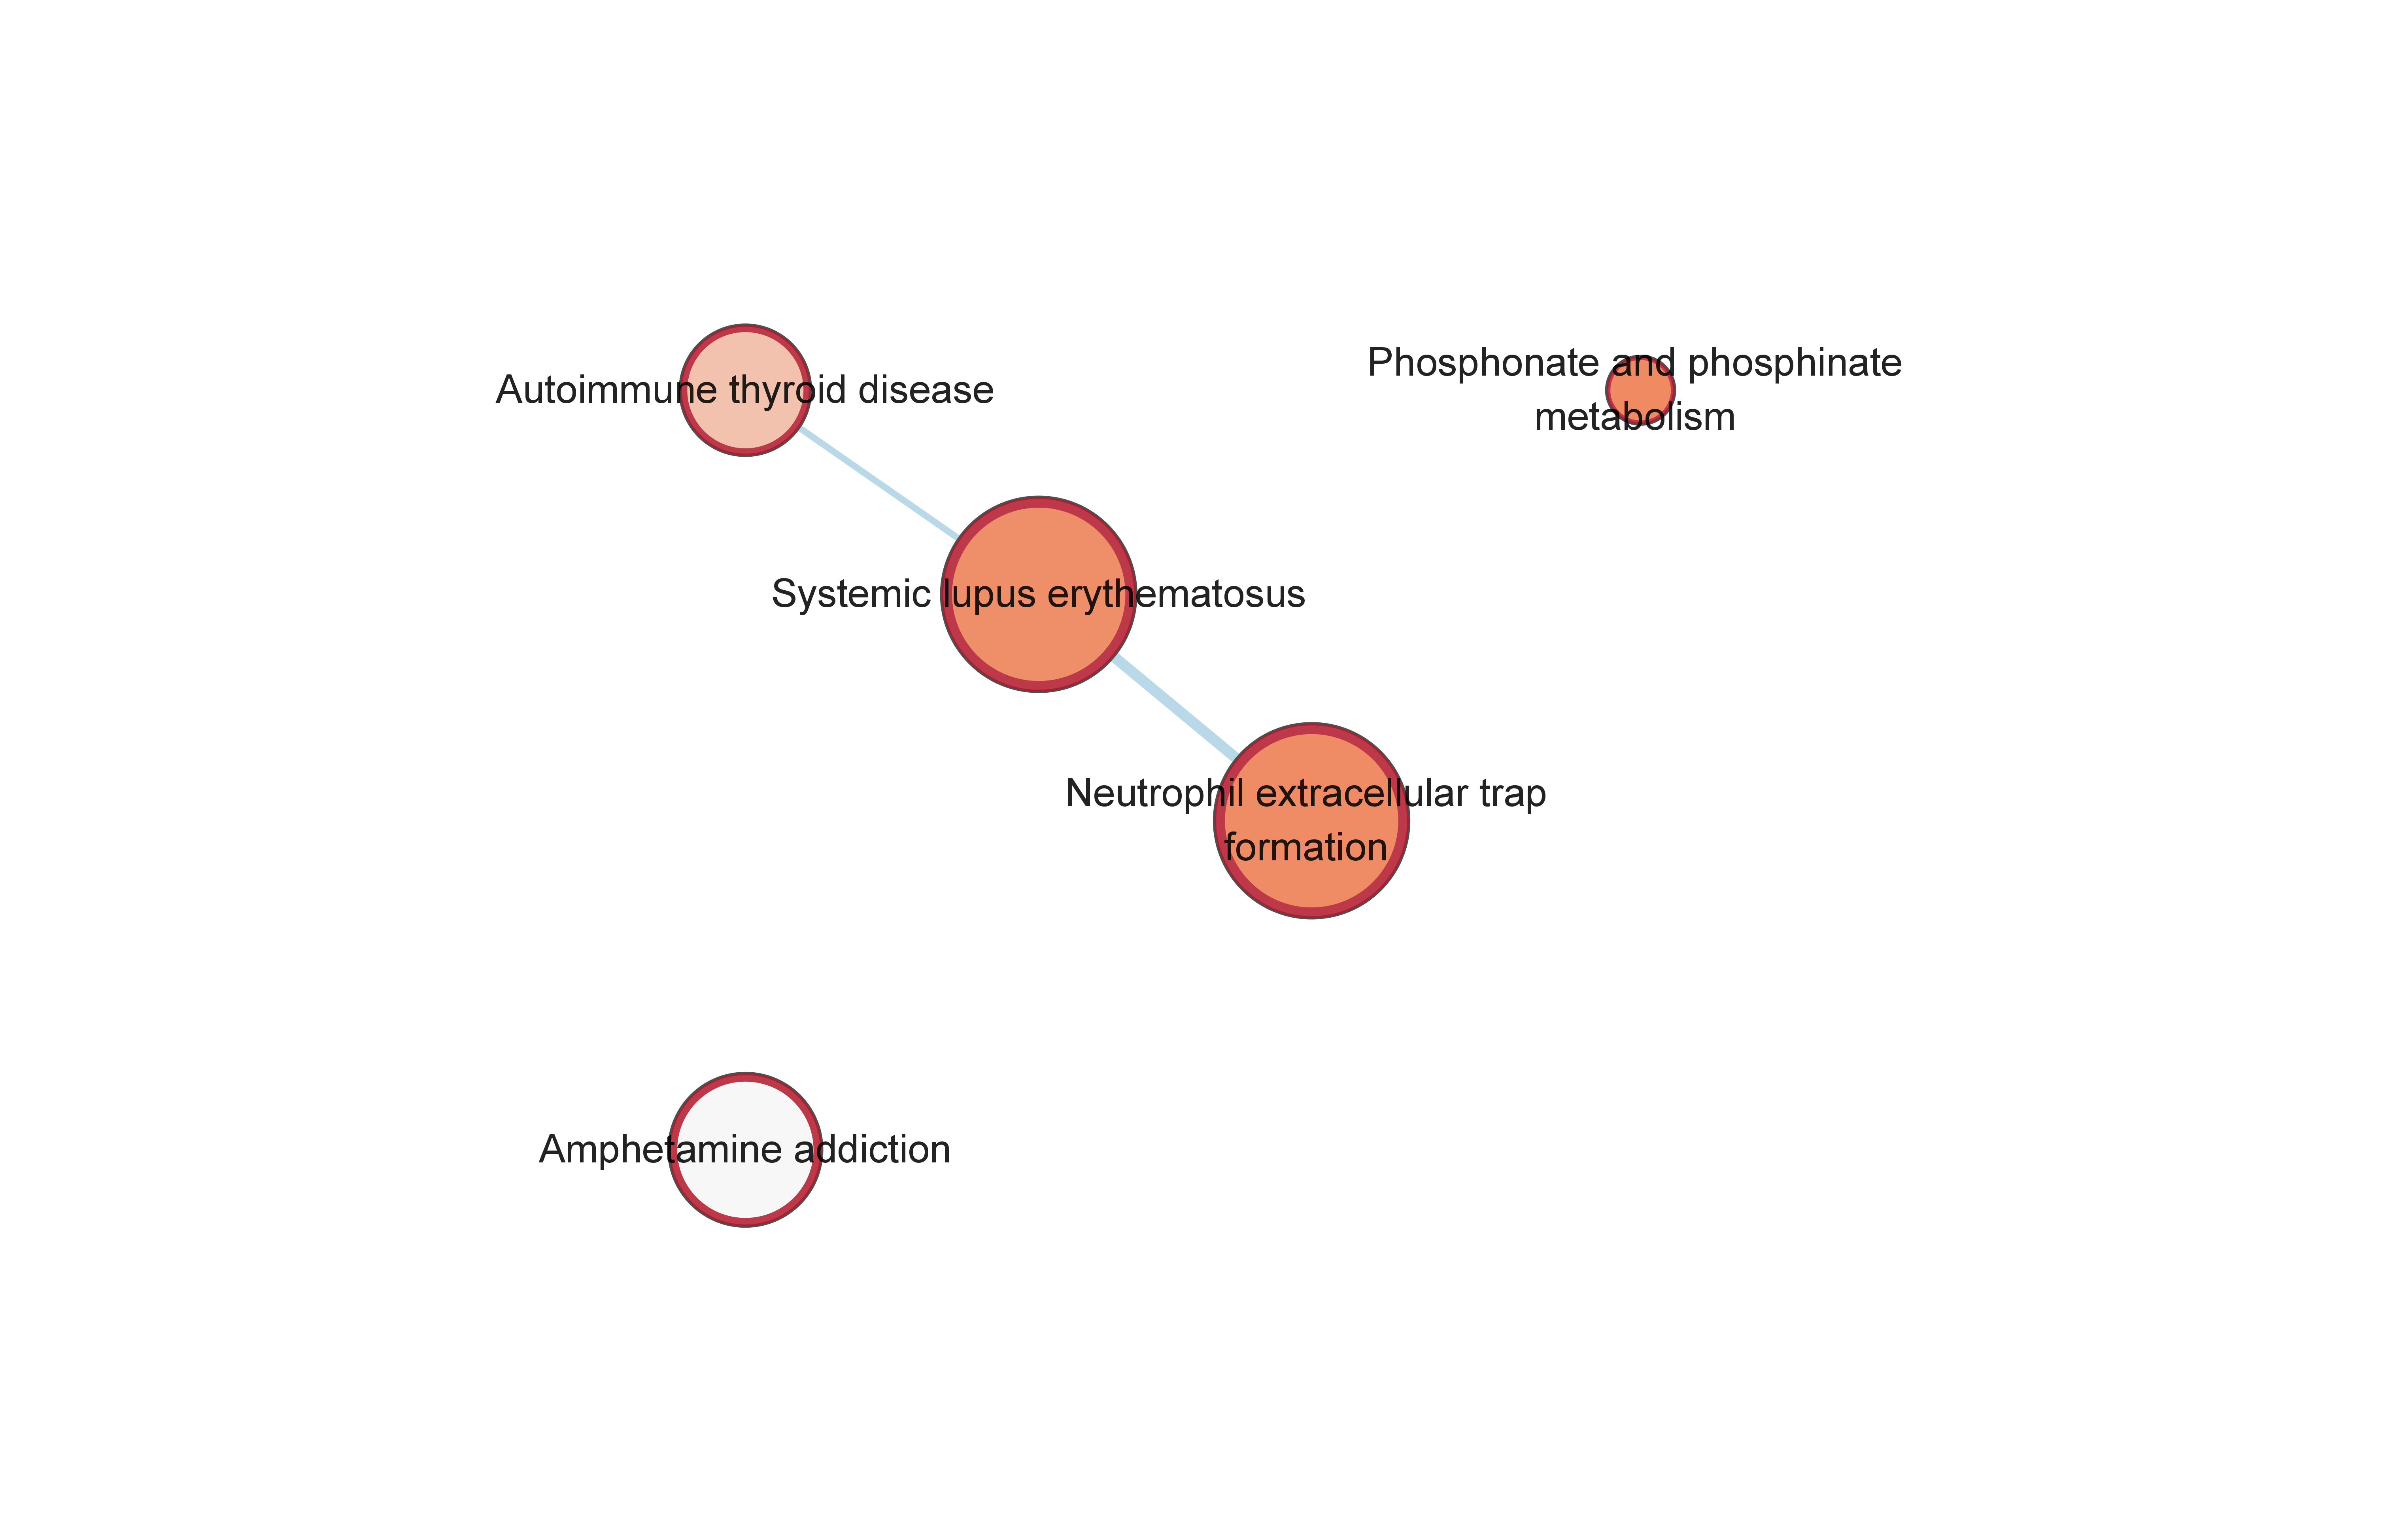

In [85]:
p4c.notebook_export_show_image()

In [164]:
p4c.set_node_custom_pie_chart(['AverageShortestPath', 'BetweennessCentrality'], style_name='galFiltered Style')

style_name not specified, so updating "default" style.


''

In [ ]:
set_node_custom_pie_chart(['AverageShortestPath', 'BetweennessCentrality'], colors=['#FF00FF', '#00FF00'], slot=2, style_name='galFiltered Style')

In [80]:
p4c.commands_help('enrichmentmap build')

['analysisType',
 'classDataset1',
 'classDataset2',
 'coeffecients',
 'coefficients',
 'combinedConstant',
 'edgeStrategy',
 'enrichments2Dataset1',
 'enrichments2Dataset2',
 'enrichmentsDataset1',
 'enrichmentsDataset2',
 'expressionDataset1',
 'expressionDataset2',
 'filterByExpressions',
 'gmtFile',
 'minExperiments',
 'nesFilter',
 'networkName',
 'parseBaderlabNames',
 'phenotype1Dataset1',
 'phenotype1Dataset2',
 'phenotype2Dataset1',
 'phenotype2Dataset2',
 'pvalue',
 'qvalue',
 'ranksDataset1',
 'ranksDataset2',
 'similaritycutoff']

In [10]:
p4c.commands_help('string')

['add nodes',
 'change confidence',
 'change type',
 'compound query',
 'disease query',
 'enable glass',
 'expand',
 'filter enrichment',
 'hide charts',
 'list species',
 'make string',
 'protein query',
 'pubmed query',
 'retrieve enrichment',
 'retrieve publications',
 'settings',
 'show charts',
 'show enrichment',
 'show images',
 'show labels',
 'show publications',
 'stringify',
 'version']

In [11]:
p4c.commands_help('string disease query')

['cutoff', 'disease', 'limit', 'networkType', 'species', 'taxonID']